In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
print(os.getcwd())

/kaggle/working


In [ ]:
df=pd.read_csv('../input/titanic/train.csv')

In [ ]:
test_df=pd.read_csv('../input/titanic/test.csv')
passengerId=test_df['PassengerId']

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


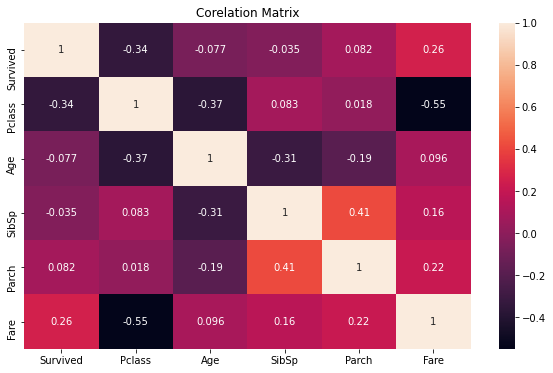

In [ ]:
plt.figure(figsize = (10, 6))
# using .heatmap() of seaborn to understand better relationship of variables 
sns.heatmap(df.corr(), annot=True)
plt.title('Corelation Matrix');

In [ ]:
cfeatures=pd.get_dummies(df)
test_cfeatures=pd.get_dummies(test_df)

In [ ]:
cfeatures.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Age          -0.077221
SibSp        -0.035322
Parch         0.081629
Fare          0.257307
Sex_female    0.543351
Sex_male     -0.543351
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.155660
Name: Survived, dtype: float64

In [ ]:
y=cfeatures['Survived']
cfeatures.drop(['Survived'],axis=1,inplace=True)


In [ ]:
cfeatures

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer

# Imputation
#my_imputer = SimpleImputer()
my_imputer = IterativeImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(cfeatures))
imputed_X_test = pd.DataFrame(my_imputer.transform(test_cfeatures))

# Imputation removed column names; put them back
imputed_X_train.columns = cfeatures.columns
imputed_X_test.columns = test_cfeatures.columns

#print("MAE from Approach 2 (Imputation):")
#print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

In [ ]:
imputed_X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1.0,19.000000,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0
888,3.0,19.712622,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer
imp=SimpleImputer()
X=pd.DataFrame(imp.fit_transform(cfeatures))

In [ ]:
imputed_X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.500000,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3.0,47.000000,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2.0,62.000000,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3.0,27.000000,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3.0,22.000000,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3.0,28.447115,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1.0,39.000000,0.0,0.0,108.9000,1.0,0.0,1.0,0.0,0.0
415,3.0,38.500000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
416,3.0,28.447115,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [ ]:
cfeatures

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
imputed_X_train.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.398262,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.398262,1.000000,-0.385311,-0.225885,0.088281,-0.111338,0.111338,0.033044,-0.027722,-0.019069
SibSp,0.083081,-0.385311,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.018443,-0.225885,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,-0.549500,0.088281,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,-0.131900,-0.111338,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,0.131900,0.111338,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.243292,0.033044,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.221009,-0.027722,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,0.081720,-0.019069,0.070941,0.063036,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#y = df["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch"]
#X = pd.get_dummies(df[features])
#X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(imputed_X_train, y)
predictions = model.predict(imputed_X_test)

output = pd.DataFrame({'PassengerId': passengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
